In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from llm_judge_reporting.calibration import confidence_interval
from llm_judge_reporting.allocation import allocate_calibration_sample


matplotlib.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams.update({"font.size": 16})
legend_fontsize = 14

/Users/chungpa/Dropbox/2 research/[LLM2] llm-as-a-judge evluation/code/release/llm_judge_reporting/allocation.py:29: UserWarning: If 'm_pilot' is 0, compute kappa using q0 and q1 as given values.
  warnings.warn(


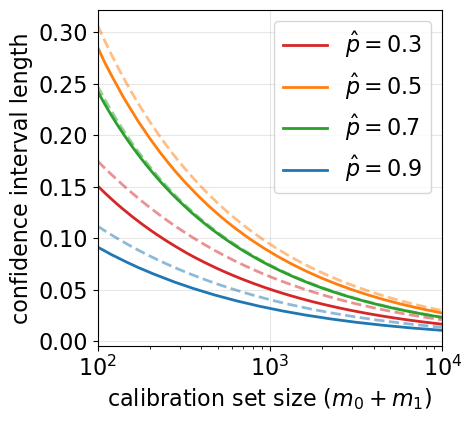

In [2]:
# parameters
p_list = [0.3, 0.5, 0.7, 0.9]
q0, q1 = (0.7, 0.9)

alpha = 0.05

# sample size
n = int(1e9)
m_values = np.arange(100, 10001, 10)

########################################################
colors = ["tab:red", "tab:orange", "tab:green", "tab:blue"]

plt.figure(figsize=(5, 4.5))

for p, color in zip(p_list, colors):
    equal_ci = []
    adapt_ci = []

    for m in m_values:
        # equal split
        ci = confidence_interval(p, q0, q1, n, m//2, m//2, alpha)
        equal_ci.append(ci[1] - ci[0])

        # adaptive split
        m0, m1 = allocate_calibration_sample(m, p, q0, q1, 0)
        ci = confidence_interval(p, q0, q1, n, m0, m1, alpha)
        adapt_ci.append(ci[1] - ci[0])

    plt.plot(m_values, adapt_ci, "-", color=color, linewidth=2, label=rf"$\hat{{p}}={p}$")
    plt.plot(m_values, equal_ci, "--", color=color, linewidth=2, alpha=0.5)

plt.xlim(min(m_values), max(m_values))
plt.xlabel(r"calibration set size ($m_0+m_1$)")
plt.ylabel("confidence interval length")
plt.xscale("log")
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30])
plt.legend()
plt.grid(alpha=0.3); plt.tight_layout()

plt.show()
plt.close()